<a href="https://colab.research.google.com/github/sjaureguimodo/datascience-digitalhouse/blob/main/TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m

# Setup

## Library Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls

Mounted at /content/drive
drive  sample_data


In [ ]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
#%matplotlib inline
import seaborn as sns
from IPython.display import Image
import re
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


print("Setup Complete")



Setup Complete


## Load data

In [ ]:
#Cargar el dataset
#df_filepath = '/content/drive/MyDrive/Colab Notebooks/Data Science - Digital House/TP3/BankChurners.csv'

df_filepath ='/content/drive/MyDrive/ColabNotebooks/BankChurners.csv'
df = pd.read_csv(df_filepath)


pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 75

df.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'nb1',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'nb2'}, inplace=True)


df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,nb1,nb2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [ ]:
#Subir desde local
#B_data_filepath = '/content/BankChurners.csv'
#df = pd.read_csv(B_data_filepath)
#pd.set_option('display.max_columns', None)
#pd.options.display.max_colwidth = 75

#df.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'nb1',
#                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'nb2'}, inplace=True)


#df.head(5)


# Analisis exploratorio

In [ ]:
# Ver el nombre de las columnas
list(df.columns)

In [ ]:
# Ver la cantidad de filas, columnas, valores no nulos por columna y typo de datos.
df.info()


Variables Categoricas. Operaciones.

## Duplicados

In [ ]:
#Eliminar duplicados
df[df.duplicated(keep=False)]


No Existen Filas duplicadas

In [ ]:
#Controlar que el id no está duplicado
df.duplicated(subset=['CLIENTNUM']).unique()


No existen CLIENTNUM Duplicados

In [ ]:
list(df.columns)

In [ ]:
df.info()

## Revision Unknowns

In [ ]:
###Hay Unknowns en variables categóricas
df[df == 'Unknown'].count()

In [ ]:
### Y hay 0s
df[df == 0].count()

## Distribucion variable target

In [ ]:
###Ver la distrbucion de la variable target
df['Attrition_Flag'].value_counts(normalize=True)

In [ ]:
import plotly.graph_objects as go

labels = ['Cliente actual','Baja']
values = [8500, 1627]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.2])])
#fig.update(layout_title_text='Attrition Flag')
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.90,
    xanchor="left",
    x=0.20
))

## Columnas nuevas

In [ ]:
#Agregar columna target segun valor de:
#Attrited Customer = 1
#Existing Customer = 0


df['Attrition_Flag_Int'] = df['Attrition_Flag'].apply(lambda x: 1 if x=='Attrited Customer' else 0)


In [ ]:
df.head(3)

In [ ]:
#Validar total de Flag Original y nuevo Flag Entero Bool

print(df.Attrition_Flag.value_counts())

print(df.Attrition_Flag_Int.value_counts())



## Visualización

### Variables categoricas

#### Gender

In [ ]:
plt.figure(figsize = (20,35))
plt.subplot(6,2,1)
plt.gca().set_title('Gender')
sns.countplot(x = 'Gender', palette = 'Set2', data = df)
plt.show()

In [ ]:
cross_tab = pd.crosstab(index=df['Gender'],
                        columns=df['Attrition_Flag'])


cross_tab_prop = pd.crosstab(index=df['Gender'],
                        columns=df['Attrition_Flag'],
                             normalize="index")
cross_tab_prop



In [ ]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Gender")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab.index.values]):
    for proportion in cross_tab_prop.loc[x]:
                
        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()


In [ ]:
### La diferencia entre Mujeres y Varones es significativa
import scipy.stats
from scipy.stats import chi2

chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(cross_tab)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

#### Income

In [ ]:
import scipy.stats
from scipy.stats import chi2
cross_tab = pd.crosstab(index=df['Income_Category'],
                        columns=df['Attrition_Flag'])

cross_tab_prop = pd.crosstab(index=df['Income_Category'],
                        columns=df['Attrition_Flag'],
                             normalize="index")
cross_tab_prop



In [ ]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Income Category")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab.index.values]):
    for proportion in cross_tab_prop.loc[x]:
                
        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()


In [ ]:
### La diferencia entre grupos de categoria de ingreso es significativa
import scipy.stats
from scipy.stats import chi2

chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(cross_tab)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

In [ ]:
plt.figure(figsize = (20,35))
plt.subplot(5,2,10)
sns.countplot(x = 'Income_Category', hue = 'Attrition_Flag', palette = 'Set2', data = df)
plt.show()

Las diferencias parecen mínimas por ingreso aunque los que ganan menos y los que ganan más tienen attrition un poco más alto.
Ver si los unknowns tiene sentido encodearlos o directamente filtrar esos valores.
Ver si lo podemos cruzar con el color de la tarjeta

#### Marital_Status

In [ ]:
cross_tab = pd.crosstab(index=df['Marital_Status'],
                        columns=df['Attrition_Flag'])

cross_tab_prop = pd.crosstab(index=df['Marital_Status'],
                        columns=df['Attrition_Flag'],
                             normalize="index")
cross_tab_prop



In [ ]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Marital_Status")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab.index.values]):
    for proportion in cross_tab_prop.loc[x]:
                
        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()


In [ ]:
plt.figure(figsize = (20,35))
plt.subplot(6,2,1)
plt.gca().set_title('Variable Education')
sns.countplot(x = 'Marital_Status', palette = 'Set2', data = df)
plt.show()

In [ ]:
### La diferencia por estado civil no es significativa
import scipy.stats
from scipy.stats import chi2

chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(cross_tab)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

#### Card_Category

In [ ]:
cross_tab = pd.crosstab(index=df['Card_Category'],
                        columns=df['Attrition_Flag'])

cross_tab_prop = pd.crosstab(index=df['Card_Category'],
                        columns=df['Attrition_Flag'],
                             normalize="index")
cross_tab_prop



In [ ]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Card_Category")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab.index.values]):
    for proportion in cross_tab_prop.loc[x]:
                
        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()


In [ ]:
plt.figure(figsize = (20,35))
plt.subplot(6,2,1)
plt.gca().set_title('Variable Education')
sns.countplot(x = 'Card_Category', palette = 'Set2', data = df)
plt.show()

In [ ]:
### La diferencia por categoria de tarjeta no es significativa
import scipy.stats
from scipy.stats import chi2

chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(cross_tab)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

Vemos una diferencia en el % de platinum, pero no sabemos si es por que tiene un n muy chico

#### Education level

In [ ]:
cross_tab = pd.crosstab(index=df['Education_Level'],
                        columns=df['Attrition_Flag'])

cross_tab_prop = pd.crosstab(index=df['Education_Level'],
                        columns=df['Attrition_Flag'],
                             normalize="index")
cross_tab_prop



In [ ]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Education_Level")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab.index.values]):
    for proportion in cross_tab_prop.loc[x]:
                
        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()


In [ ]:
plt.figure(figsize = (20,35))
plt.subplot(6,2,1)
plt.gca().set_title('Variable Education')
sns.countplot(x = 'Education_Level', palette = 'Set2', data = df)
plt.show()

In [ ]:
### La diferencia por nivel de educacion no es significativa
import scipy.stats
from scipy.stats import chi2

chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(cross_tab)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

### Variables continuas

<ipython-input-40-63471a861d8e>:4: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



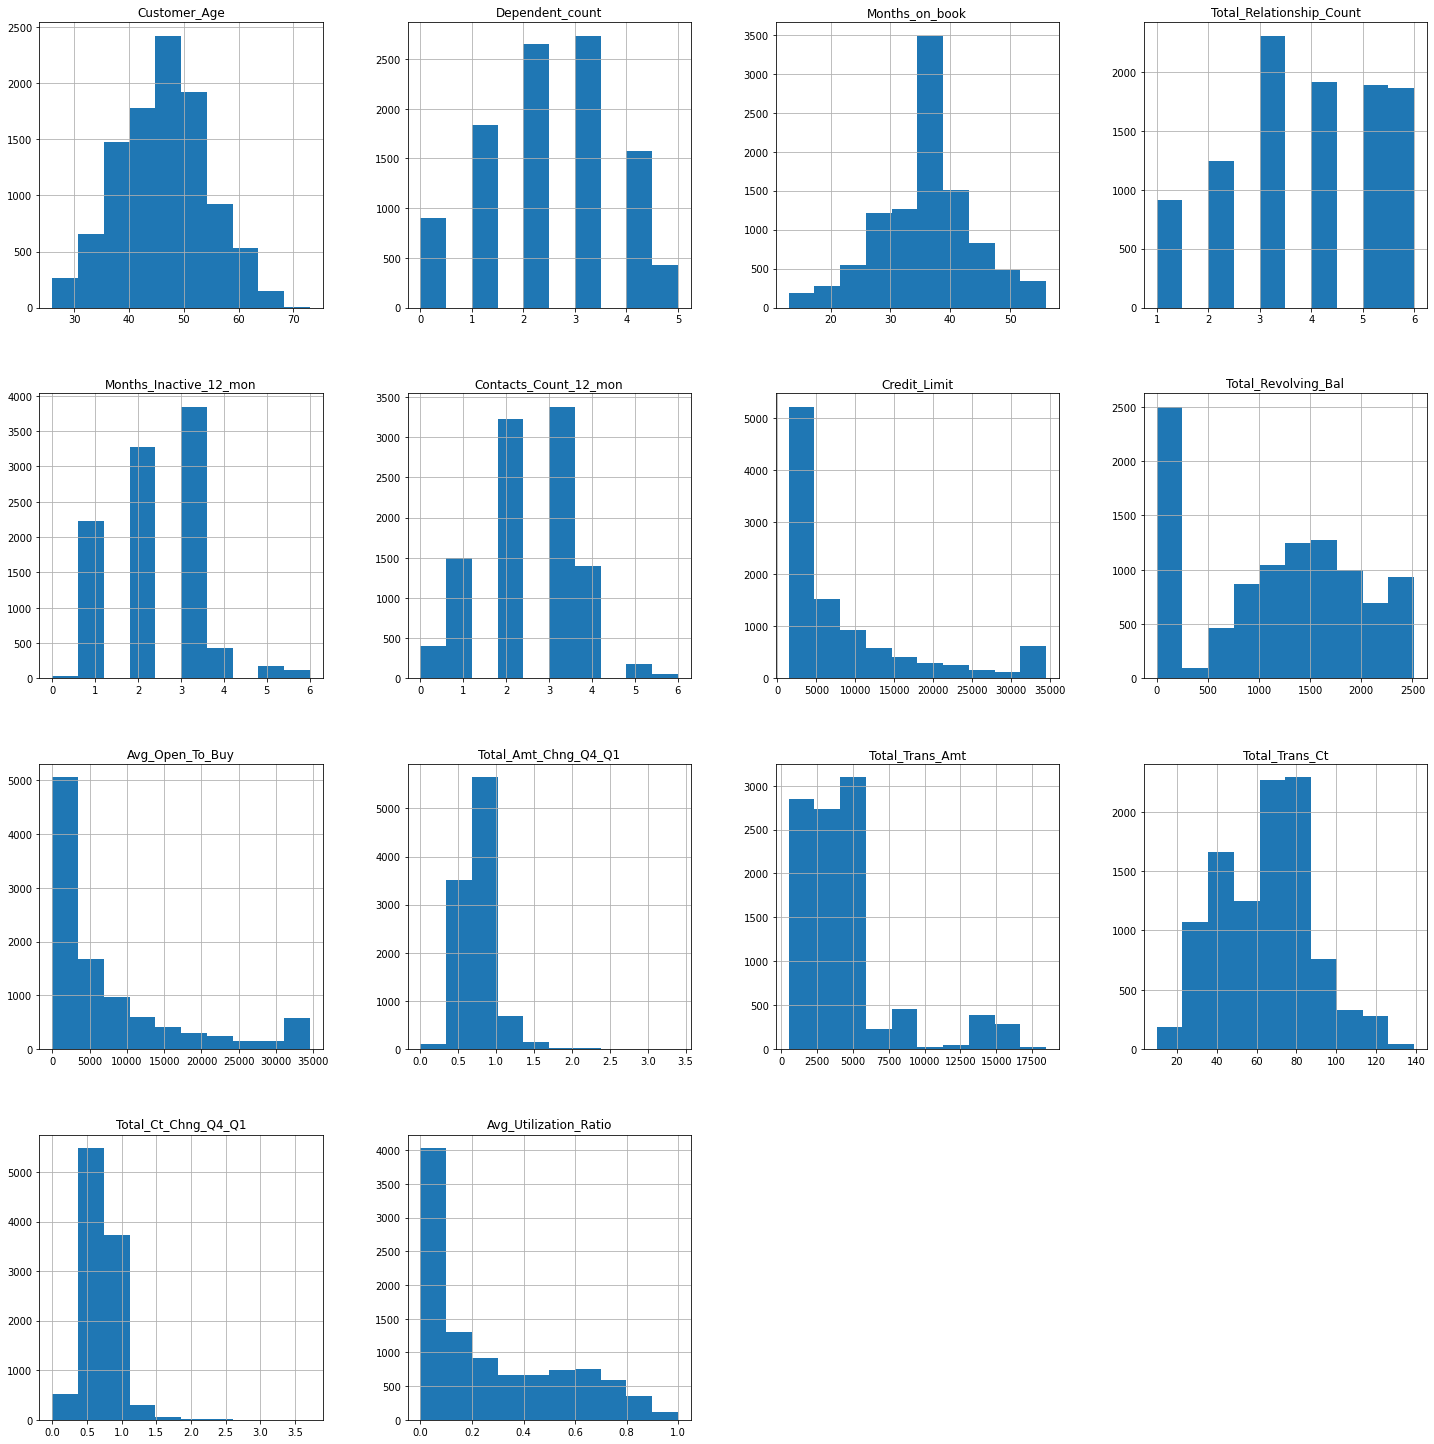

In [ ]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
plt.tight_layout()
df.loc[:, ~df.columns.isin(['CLIENTNUM', 'nb1', 'nb2', "Attrition_Flag_Int"])].hist(ax = ax)
fig.show()

In [ ]:
df.loc[:, ~df.columns.isin(['CLIENTNUM', 'nb1', 'nb2'])].describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Int
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.160660
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.367235
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,1.000000


#### Matriz de correlacion

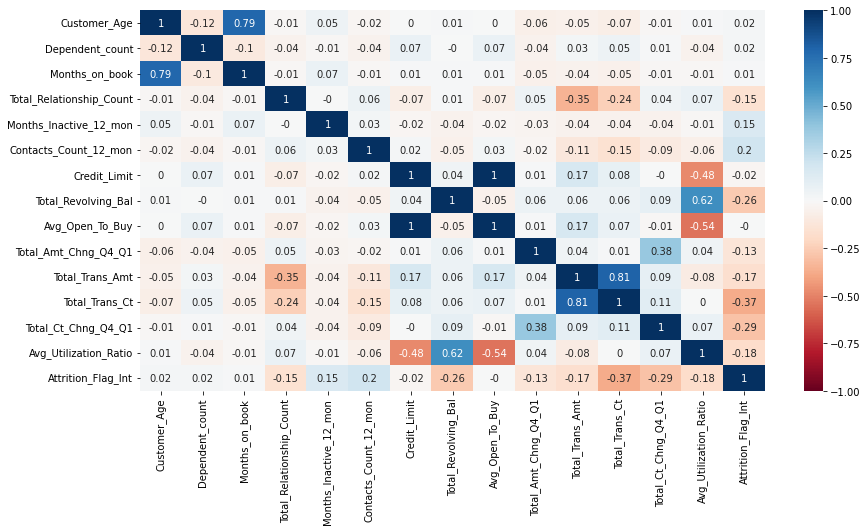

In [ ]:
correlation = df.loc[:, ~df.columns.isin(['CLIENTNUM', 'nb1', 'nb2'])].corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'RdBu', vmin=-1, vmax=1)
plt.show()


- Vemos correlación entre la variable Revolving_balance y avg_utilization ratio. Creemos que esto es porque cuanto más usás la tarjeta, mayor es tu saldo deudor.
- Lo mismo pasa con monto y cantidad de TRX

#### Box plot edad

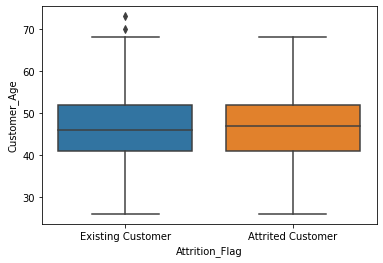

In [ ]:
#Box plot attrition edad
sns.boxplot(x='Attrition_Flag', y='Customer_Age', data=df)

No vemos diferencia entre los 2 grupos

#### Box plot dependent count

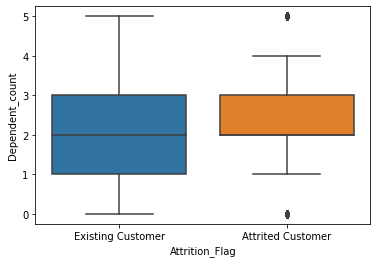

In [ ]:
#Box plot attrition dependent_count
sns.boxplot(x='Attrition_Flag', y='Dependent_count', data=df)

Vemos bien sumarla al modelo

#### Box plot months on book

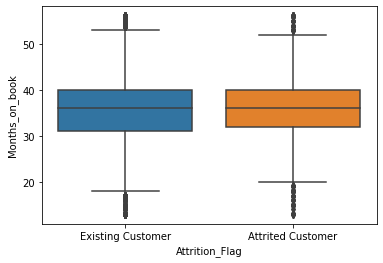

In [ ]:
#Box plot attrition antiguedad
sns.boxplot(x='Attrition_Flag', y='Months_on_book', data=df)

No vemos diferencia entre los grupos

#### Box plot Total_Relationship_Count

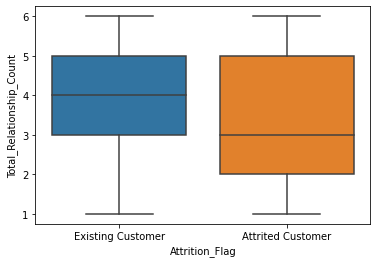

In [ ]:
#Box plot attrition relationship count
sns.boxplot(x='Attrition_Flag', y='Total_Relationship_Count', data=df)

Vemos una diferencia entre los grupos, podríamos usarlo como variable predictora

#### Boxplot Months_Inactive_12_mon

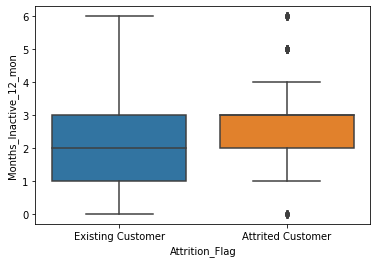

In [ ]:
#Box plot attrition antiguedad
sns.boxplot(x='Attrition_Flag', y='Months_Inactive_12_mon', data=df)

Vemos una diferencia entre los grupos, podríamos usarlo como variable predictora

#### Boxplot Contacts_Count_12_mon

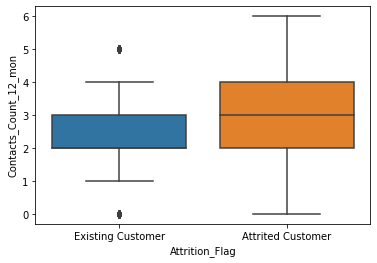

In [ ]:
sns.boxplot(x='Attrition_Flag', y='Contacts_Count_12_mon', data=df)

Vemos una diferencia entre los grupos, podríamos usarlo como variable predictora

#### Boxplot Credit_Limit

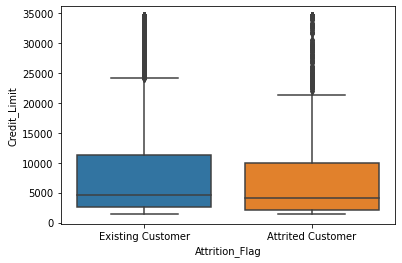

In [ ]:
sns.boxplot(x='Attrition_Flag', y='Credit_Limit', data=df)

Vemos una diferencia chica en los grupos, podría llegar a usarse como variable predictora




#### Boxplot Total_Revolving_Bal

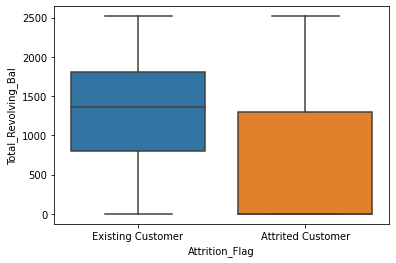

In [ ]:
### Attrition y saldo deudor. Los que abandonan tienen menos saldo deudor.
sns.boxplot(x='Attrition_Flag', y='Total_Revolving_Bal', data=df)

Vemos una diferencia clara en los grupos y creemos que suma valor al modelo como variable predictora

#### Boxplot Avg_Open_To_Buy

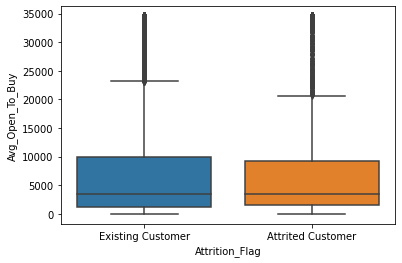

In [ ]:
## Attrition y monto disponible
sns.boxplot(x='Attrition_Flag', y='Avg_Open_To_Buy', data=df)

No vemos mucha diferencia, más que "Existing customer" tiene más variabilidad que "Attrited customer"

#### Boxplot Total_Amt_Chng_Q4_Q1

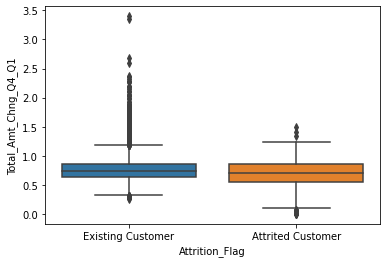

In [ ]:
sns.boxplot(x='Attrition_Flag', y='Total_Amt_Chng_Q4_Q1', data=df)

No vemos valor en sumarla al modelo

#### Boxplot Total_Trans_Amt

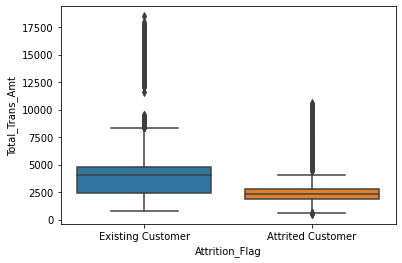

In [ ]:
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Amt', data=df)

Vemos una diferencia clara en los grupos y creemos que suma valor agregarla al modelo

#### Boxplot Total_Trans_Ct

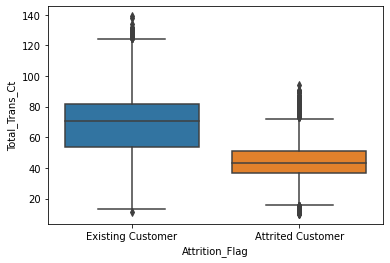

In [ ]:
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Ct', data=df)

Vemos la misma diferencia, pero como una es cantidad de TRX y la otra monto deberíamos elegir solo una (por estar correlacionadas).
Vamos con count que es la que mayor diferencia presenta en los grupos

#### Boxplot Total_Ct_Chng_Q4_Q1

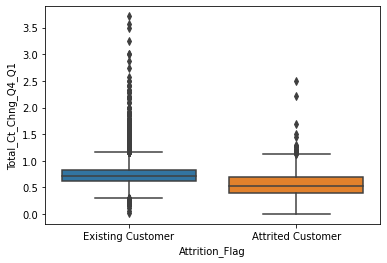

In [ ]:
sns.boxplot(x='Attrition_Flag', y='Total_Ct_Chng_Q4_Q1', data=df)


Preferimos no sumarla al modelo por explicabilidad

#### Boxplot Avg_Utilization_Ratio

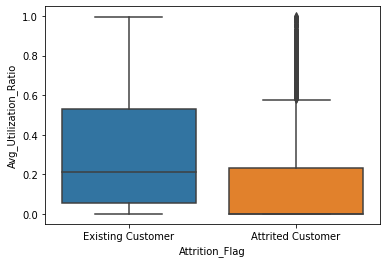

In [ ]:
sns.boxplot(x='Attrition_Flag', y='Avg_Utilization_Ratio', data=df)

Vemos una diferencia en los grupos y creemos que puede sumar valor al modelo

In [ ]:
#Graficos para variables categoricas

#Income_Category
#Gender
#Education_Level
#Marital_Status
#Card_Category

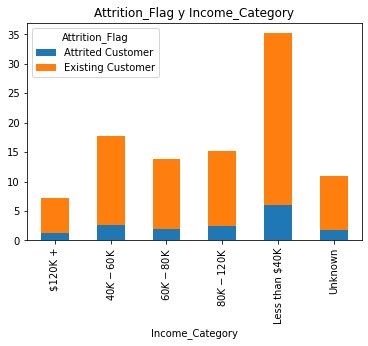

In [ ]:
#AA-Desafio3

F=df.groupby(['Income_Category','Attrition_Flag']).size()
TotalF = F.sum()

Flag =(F.loc[:]*100)/TotalF
Flag

#Se resetea los indices
Flag = Flag.reset_index()

#Se ordena por Totales
Flag2 = Flag.sort_values([0], ascending=False)

#Se valida Orden de Totales
Flag2

#Grafico
Flag2 = pd.pivot_table(Flag2, columns = 'Attrition_Flag', index = 'Income_Category', values = 0)

Flag2.plot(kind = 'bar', stacked = True,  title='Attrition_Flag y Income_Category')



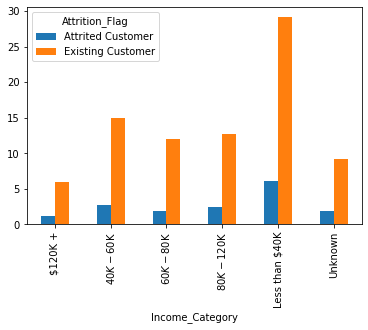

In [ ]:
Flag2.plot(kind = 'bar')

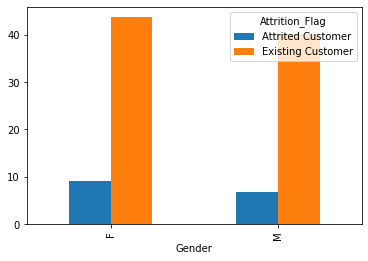

In [ ]:
#AA-Desafio3

F_G=df.groupby(['Gender','Attrition_Flag']).size()
TotalG = F_G.sum()

Flag_G =(F_G.loc[:]*100)/TotalG
Flag_G


#Se resetea los indices
Flag_Gender = Flag_G.reset_index()

#Se ordena por Totales
Flag_Gender2 = Flag_Gender.sort_values([0], ascending=False)

#Se valida Orden de Totales
Flag_Gender2

#Grafico
Flag_Gender2 = pd.pivot_table(Flag_Gender2, columns = 'Attrition_Flag', index = 'Gender', values = 0)
Flag_Gender2.plot(kind = 'bar')


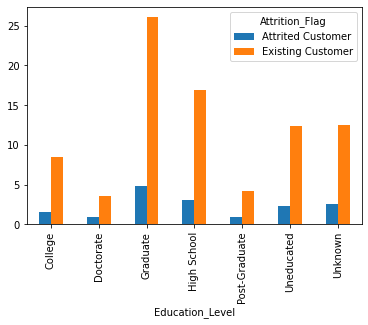

In [ ]:
#AA-Desafio3
#Education_Level

F_EL=df.groupby(['Education_Level','Attrition_Flag']).size()
TotalE = F_EL.sum()

Flag_EL =(F_EL.loc[:]*100)/TotalE
Flag_EL


#Se resetea los indices
Flag_Educ = Flag_EL.reset_index()

#Se ordena por Totales
Flag_Educ2 = Flag_Educ.sort_values([0], ascending=False)

#Se valida Orden de Totales
Flag_Educ2

#Grafico
Flag_Educ2 = pd.pivot_table(Flag_Educ2, columns = 'Attrition_Flag', index = 'Education_Level', values = 0)
Flag_Educ2.plot(kind = 'bar')

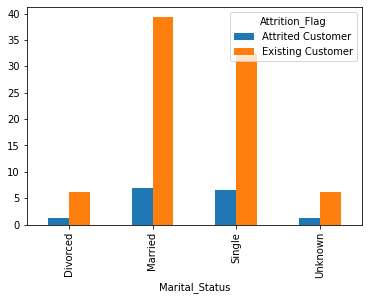

In [ ]:
#AA-Desafio3
#Marital_Status

F_MS=df.groupby(['Marital_Status','Attrition_Flag']).size()
TotalMS = F_MS.sum()

F_MS =(F_MS.loc[:]*100)/TotalMS
F_MS


#Se resetea los indices
Flag_MS = F_MS.reset_index()

#Se ordena por Totales
Flag_MS2 = Flag_MS.sort_values([0], ascending=False)

#Se valida Orden de Totales
Flag_MS2


#Grafico
Flag_MS2 = pd.pivot_table(Flag_MS2, columns = 'Attrition_Flag', index = 'Marital_Status', values = 0)
Flag_MS2.plot(kind = 'bar')

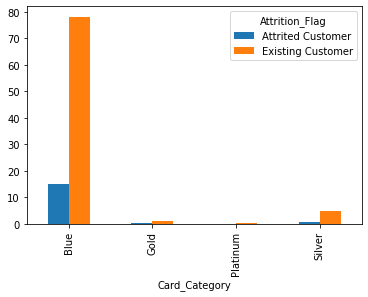

In [ ]:
#AA-Desafio3
#Card_Category

F_CC=df.groupby(['Card_Category','Attrition_Flag']).size()
TotalCC = F_CC.sum()

Flag_CC =(F_CC.loc[:]*100)/TotalCC
Flag_CC


#Se resetea los indices
Flag_Card = Flag_CC.reset_index()

#Se ordena por Totales
Flag_Card2 = Flag_Card.sort_values([0], ascending=False)

#Se valida Orden de Totales
Flag_Card2

#Grafico
Flag_Card2 = pd.pivot_table(Flag_Card2, columns = 'Attrition_Flag', index = 'Card_Category', values = 0)
Flag_Card2.plot(kind = 'bar')

# Seleccionar variables

In [ ]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'nb1',
       'nb2', 'Attrition_Flag_Int'],
      dtype='object')

## Numericas

- Customer_Age
- Dependent_count
- Total_Relationship_Count
- Months_Inactive_12_mon
- Contacts_Count_12_mon
- Credit_Limit
- Total_Revolving_Bal
- Total_Trans_Ct
- Total_Ct_Chng_Q4_Q1
- Avg_Utilization_Ratio

## Categoricas

- Gender
- Income_Category
- Card_Category
- Education_Level

# Armar los modelos


### BASE LINE: NAIVE BAYES

In [ ]:
### Pasar variables categoricas relevantes a ordinales
df1= df.copy()
print(df1['Income_Category'].unique())
df1['Income_Category'].replace(['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown'], 
                               [1, 2, 3, 4, 5, 99], inplace=True)


['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']


In [ ]:
df1.Income_Category.unique()

array([ 3,  1,  4,  2,  5, 99])

In [ ]:
### Pasar variables categóricas a ordinales
print(df1['Gender'].unique())
df1['Gender'].replace(['F', 'M'], 
                    [0, 1], inplace=True)

['M' 'F']


In [ ]:
df1.Gender.unique()

array([1, 0])

In [ ]:
###Separar features y target

X = df1[['Avg_Utilization_Ratio', 'Total_Relationship_Count', 'Total_Revolving_Bal', 'Total_Trans_Ct', 'Months_Inactive_12_mon', 'Total_Ct_Chng_Q4_Q1',
        'Contacts_Count_12_mon', 'Dependent_count', 'Customer_Age', 'Income_Category', 'Gender']]
Y = df1['Attrition_Flag_Int']

In [ ]:
# separamos los conjuntos de entrenamiento y test para el clasificador clasificador, con una proporción 70-30:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1237)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7088, 11)
(3039, 11)
(7088,)
(3039,)


In [ ]:
###Instanciamos el modelo y lo entrenamos
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [ ]:
###Predecir las etiquetas de test del modelo NAIVE BAYES
Y_pred = gnb.predict(X_test)

Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
###Calculamos accuracy de test
from sklearn.metrics import accuracy_score
round(accuracy_score(Y_test, Y_pred), 2)

0.9

In [ ]:
#Sensibilidad NAIVE BAYES

recall_score(Y_test, Y_pred, average='macro')

0.7754853663783965

In [ ]:
#Especificidad de NAIVE BAYES
recall_score(np.logical_not(Y_test) , np.logical_not(Y_pred))

0.9653133622388648

In [ ]:
from sklearn.metrics import f1_score
print(f1_score(Y_test,Y_pred))

0.6651583710407241


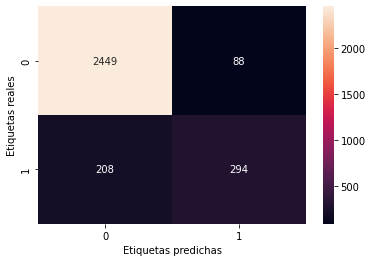

In [ ]:
###Matriz de confusion
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

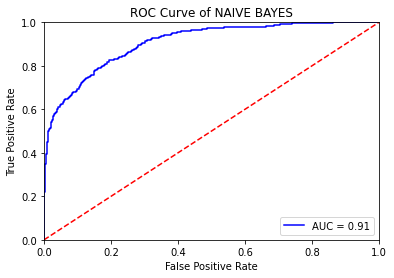

In [ ]:
Y_scores = gnb.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(Y_test, Y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Naive Bayes Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of NAIVE BAYES')
plt.show()

## KNN

In [ ]:
#Volcamos los datos a un DataFrame
dfKnn = pd.DataFrame(df, columns=['Total_Trans_Ct', 'Income_Category','Attrition_Flag_Int'])

dfKnn.head()

,Total_Trans_Ct,Income_Category,Attrition_Flag_Int
0,42,$60K - $80K,0
1,33,Less than $40K,0
2,20,$80K - $120K,0
3,20,Less than $40K,0
4,28,$60K - $80K,0


In [ ]:
dfKnn['Income_Category'] = dfKnn.Income_Category.map({'Unknown':1,
                                                'Less than $40K':1,
                                                '$40K - $60K':2,
                                                '$60K - $80K':3,
                                                '$80K - $120K':4, 
                                                '$120K +':5})

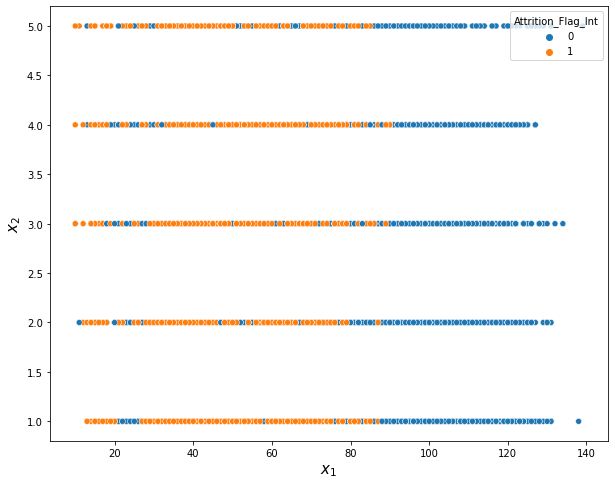

In [ ]:
# Visualizamos los datos
plt.figure(figsize=(10,8))
sns.scatterplot(x='Total_Trans_Ct', y='Income_Category', data=dfKnn, hue='Attrition_Flag_Int')
plt.xlabel(f'$x_1$', fontsize=15)
plt.ylabel(f'$x_2$', fontsize=15);

In [ ]:
dfKnn.groupby('Attrition_Flag_Int')['Income_Category'].mean()


Attrition_Flag_Int
0    2.203294
1    2.154886
Name: Income_Category, dtype: float64

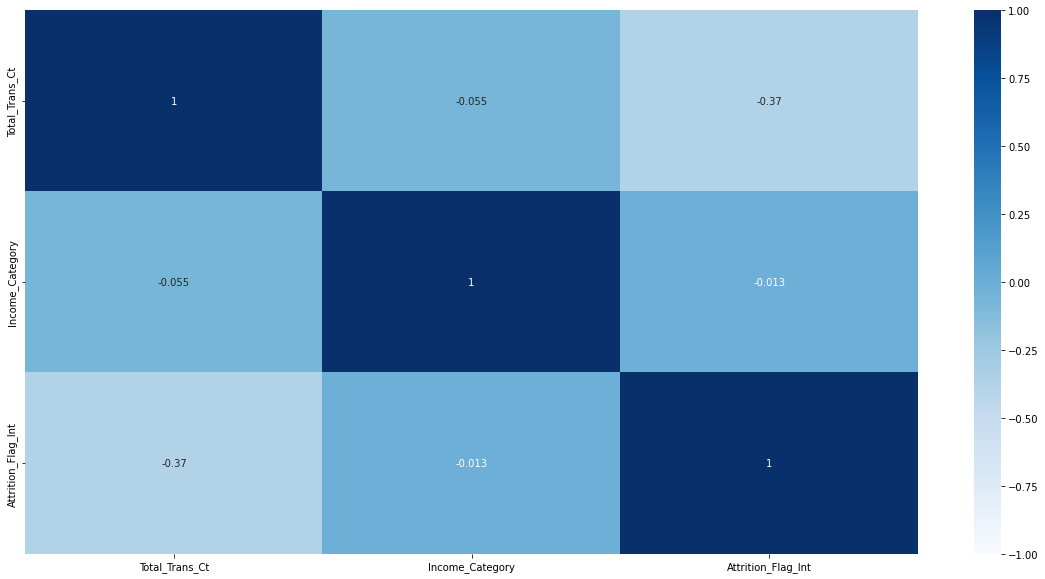

In [ ]:

plt.figure(figsize=(20,10))
sns.heatmap(dfKnn.corr(), annot=True, vmin=-1, cmap='Blues');


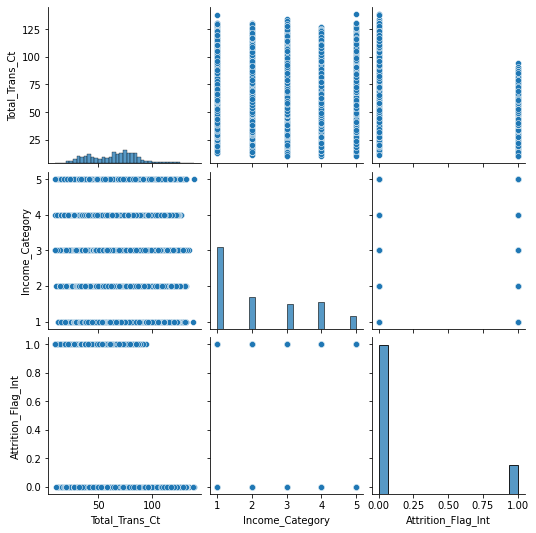

In [ ]:
sns.pairplot(dfKnn);

In [ ]:
# Construir la variable target: Attrition_Flag_Int
y = dfKnn['Attrition_Flag_Int']
y.head()


0    0
1    0
2    0
3    0
4    0
Name: Attrition_Flag_Int, dtype: int64

In [ ]:
X = dfKnn[['Total_Trans_Ct', 'Income_Category']]

In [ ]:
# Separar los conjuntos de entrenamiento y testeo, estratificando por clase
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [ ]:
# Estandarización de variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def scores_knn(X, y, start,stop,step):
    
    # Vamos a graficar los distintos valores del score de cross validation en función del hiperparámetro n_neighbors
    # Para esto vamos a generar una lista de diccionarios que después se puede convertir fácilmente en DataFrame
    
    # Lista de diccionarios - la inicializamos vacío y por fuera del for loop para ir alimentándola en cada iteración
    scores_para_df = []
    
    for i in range(start,stop,step):
        
        # En cada iteración, instanciamos el modelo con un hiperparámetro distinto
        model = KNeighborsClassifier(n_neighbors=i)

        # cross_val_scores nos devuelve un array de 5 resultados, uno por cada partición que hizo automáticamente CV
        kf = KFold(n_splits=10, shuffle=True, random_state=10)
        cv_scores = cross_val_score(model, X, y, cv=kf)

        # Para cada valor de n_neighbours, creamos un diccionario con el valor de n_neighbours y la media y el desvío de los scores
        dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}

        # Guardamos cada uno en la lista de diccionarios
        scores_para_df.append(dict_row_score)
    
    # Creamos el DF a partir de la lista de resultados
    df_scores = pd.DataFrame(scores_para_df)
    
    # Incorporamos los límites inferior y superior, restando y sumando el valor del desvío estándar, respectivamente
    df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
    df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
    
    # Retornamos el DF
    return df_scores


In [ ]:
# Probamos de 1 a 20 vecinos
df_scores= scores_knn(X_train, y_train, 1, 21, 1)

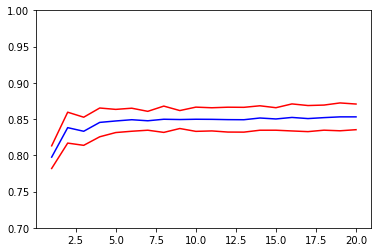

In [ ]:
# Visualizamos los resultados

plt.plot(df_scores['n_neighbours'], df_scores['limite_inferior'], color='r')
plt.plot(df_scores['n_neighbours'], df_scores['score_medio'], color='b')
plt.plot(df_scores['n_neighbours'], df_scores['limite_superior'], color='r')
plt.ylim(0.7, 1);

In [ ]:
#Prediccion en Test
# Identificamos el score máximo
df_scores.loc[df_scores.score_medio == df_scores.score_medio.max()]


,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
19,0.853059,0.017701,20,0.835358,0.870759


In [ ]:
# Asignamos el valor del k óptimo a una variable
best_k = df_scores.loc[df_scores.score_medio == df_scores.score_medio.max(),'n_neighbours'].values[0]
best_k

20

In [ ]:
# Elegimos el modelo óptimo que nos había indicado cross validation
model = KNeighborsClassifier(n_neighbors=best_k)

# Lo ajustamos sobre datos de entrenamiento
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
from sklearn.metrics import accuracy_score

# Evaluamos qué accuracy obtenemos en train
accuracy_score(y_train, model.predict(X_train))

0.8605661619486504

In [ ]:
# Lo utilizamos para predecir en test
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]



In [ ]:
# Computamos el accuracy score en test
accuracy_score(y_test, y_pred)


0.8495260663507109

In [ ]:
#Sensibilidad 
recall_score(y_test, y_pred)

0.2800982800982801

In [ ]:
#f1 score
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))

0.37438423645320196


In [ ]:
#Especificidad
specificity = TN / (TN + FP)
print(specificity)

0.9585882352941176


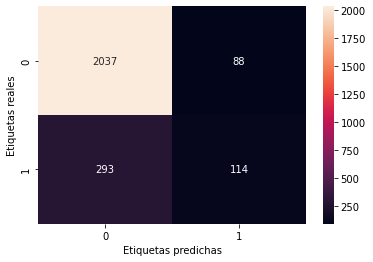

In [ ]:
from sklearn.metrics import confusion_matrix

# Graficamos la matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

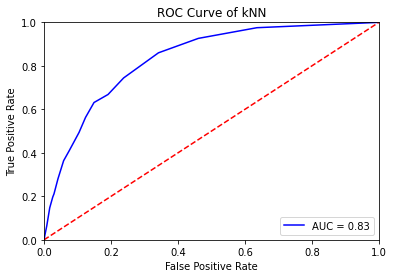

In [ ]:
y_scores = model.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

## Regresion logistica

### Preparacion del modelo

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

#### Numericas

In [ ]:
numericals = ['Dependent_count',
'Total_Relationship_Count',
'Months_Inactive_12_mon',
'Contacts_Count_12_mon',
'Credit_Limit',
'Total_Revolving_Bal',
'Total_Trans_Ct',
'Avg_Utilization_Ratio']

X = df[numericals]

scaler = StandardScaler()
scaler.fit(X)

std_numerical_data = scaler.transform(X)
std_df = pd.DataFrame(std_numerical_data)
std_df.columns = [i + '_std' for i in numericals]
std_df

,Dependent_count_std,Total_Relationship_Count_std,Months_Inactive_12_mon_std,Contacts_Count_12_mon_std,Credit_Limit_std,Total_Revolving_Bal_std,Total_Trans_Ct_std,Avg_Utilization_Ratio_std
0,0.503368,0.763943,-1.327136,0.492404,0.446622,-0.473422,-0.973895,-0.775882
1,2.043199,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-1.357340,-0.616276
2,0.503368,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-1.911206,-0.997155
3,1.273283,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-1.911206,1.759686
4,0.503368,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-1.570365,-0.997155
...,...,...,...,...,...,...,...,...
10122,-0.266547,-0.522785,-0.337598,0.492404,-0.509330,0.844455,2.221481,0.678714
10123,-0.266547,0.120579,-0.337598,0.492404,-0.479181,1.255524,0.176440,0.856458
10124,-1.036462,0.763943,0.651940,1.396424,-0.354626,-1.426858,-0.207005,-0.997155
10125,-0.266547,0.120579,0.651940,0.492404,-0.368710,-1.426858,-0.121795,-0.997155


#### Categoricas

##### Encoding ordinal

In [ ]:
Income_Category_enc = df['Income_Category']
Income_Category_enc.unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [ ]:
#Mapeamos los unknown a 1, 40-60k, que es el valor mas repetido
Income_Category_enc = Income_Category_enc.map({'Unknown':1,
                                                'Less than $40K':1,
                                                '$40K - $60K':2,
                                                '$60K - $80K':3,
                                                '$80K - $120K':4, 
                                                '$120K +':5})

In [ ]:
Card_Category_enc = df['Card_Category']
Card_Category_enc.unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [ ]:
Card_Category_enc = Card_Category_enc.map({'Blue':0,
                                          'Silver':1,
                                          'Gold':2,
                                          'Platinum':3})

In [ ]:
Education_Level_enc = df['Education_Level']
Education_Level_enc.unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [ ]:
# Mapeamos los unknown a College, que es el valor mas repetido
Education_Level_enc = Education_Level_enc.map({'Unknown':4,
                                              'Uneducated':1,
                                              'High School':2, 
                                              'College':3,
                                              'Graduate':4,  
                                              'Post-Graduate':5,
                                              'Doctorate':6})

##### Onehot encoder

In [ ]:
categoricals = ['Gender']

enc = OneHotEncoder(drop='first')
X = df[categoricals]
enc.fit(X)
enc.categories_

[array(['F', 'M'], dtype=object)]

In [ ]:
dummies = enc.transform(X).toarray()
dummies

array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]])

In [ ]:
dummies.shape

(10127, 1)

In [ ]:
dummies_df = pd.DataFrame(dummies)
dummies_df

,0
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
10122,1.0
10123,1.0
10124,0.0
10125,1.0


In [ ]:
col_names = [categoricals[i] + '_' + enc.categories_[i] for i in range(len(categoricals)) ]

col_names

[array(['Gender_F', 'Gender_M'], dtype=object)]

In [ ]:
col_names_drop_first = [sublist[i] for sublist in col_names for i in range(len(sublist)) if i != 0]
col_names_drop_first

['Gender_M']

In [ ]:
dummies_df.columns = col_names_drop_first
dummies_df

,Gender_M
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
10122,1.0
10123,1.0
10124,0.0
10125,1.0


#### Concatenar resultados

In [ ]:
df_prep = pd.concat([dummies_df,
                     std_df,
                     Income_Category_enc,
                     Card_Category_enc,
                     Education_Level_enc
                     ], axis = 1)
df_prep

,Gender_M,Dependent_count_std,Total_Relationship_Count_std,Months_Inactive_12_mon_std,Contacts_Count_12_mon_std,Credit_Limit_std,Total_Revolving_Bal_std,Total_Trans_Ct_std,Avg_Utilization_Ratio_std,Income_Category,Card_Category,Education_Level
0,1.0,0.503368,0.763943,-1.327136,0.492404,0.446622,-0.473422,-0.973895,-0.775882,3,0,2
1,0.0,2.043199,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-1.357340,-0.616276,1,0,4
2,1.0,0.503368,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-1.911206,-0.997155,4,0,4
3,0.0,1.273283,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-1.911206,1.759686,1,0,2
4,1.0,0.503368,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-1.570365,-0.997155,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1.0,-0.266547,-0.522785,-0.337598,0.492404,-0.509330,0.844455,2.221481,0.678714,2,0,4
10123,1.0,-0.266547,0.120579,-0.337598,0.492404,-0.479181,1.255524,0.176440,0.856458,2,0,4
10124,0.0,-1.036462,0.763943,0.651940,1.396424,-0.354626,-1.426858,-0.207005,-0.997155,1,0,2
10125,1.0,-0.266547,0.120579,0.651940,0.492404,-0.368710,-1.426858,-0.121795,-0.997155,2,0,4


### Entrenamiento

In [ ]:
X = df_prep
y = df.Attrition_Flag_Int

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 12)

In [ ]:
logistic_regression = LogisticRegression(penalty='none') 
logistic_regression.fit(X_train, y_train);

In [ ]:
y_test_pred = logistic_regression.predict(X_test)
y_test_pred

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
y_test_pred_proba = logistic_regression.predict_proba(X_test)
y_test_pred_proba

array([[9.90282850e-01, 9.71715048e-03],
       [8.47325599e-01, 1.52674401e-01],
       [2.57837828e-01, 7.42162172e-01],
       ...,
       [6.41493357e-01, 3.58506643e-01],
       [3.82362714e-01, 6.17637286e-01],
       [9.99021169e-01, 9.78830898e-04]])

In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[2053,   72],
       [ 206,  201]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test, y_test_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]



In [ ]:
# Computamos el accuracy score en test
accuracy_score(y_test, y_test_pred)


0.8902053712480252

In [ ]:
#Sensibilidad 
recall_score(y_test, y_test_pred)

0.49385749385749383

In [ ]:
#Especificidad
specificity = TN / (TN + FP)
print(specificity)

0.9661176470588235


In [ ]:
#f1 score
print(f1_score(y_test, y_test_pred))

0.5911764705882353


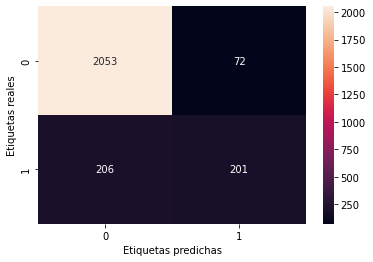

In [ ]:
# Graficamos la matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

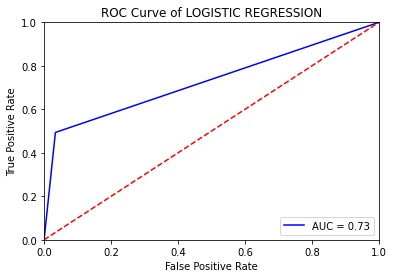

In [ ]:
Y_scores = logistic_regression.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

plt.title('Logistic RegressionClassifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of LOGISTIC REGRESSION')
plt.show()

# Seleccion, conclusiones etc